In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipyparallel as ipp
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MESS
from scipy import stats

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

In [2]:
data = MESS.Region("watdo")
data.set_param("community_assembly_model", "pairwise_competition")
data.set_param("J", 10)
data._hackersonly["mode"] = "landbridge"
print(data.get_params())

------- MESS params file (v.0.1.1)----------------------------------------------
watdo                ## [0] [simulation_name]: The name of this simulation scenario
./default_MESS       ## [1] [project_dir]: Where to save files
0                    ## [2] [generations]: Duration of simulations. Values/ranges Int for generations, or float [0-1] for lambda.
pairwise_competition ## [3] [community_assembly_model]: Model of Community Assembly: neutral, filtering, competition
point_mutation       ## [4] [speciation_model]: Type of speciation process: none, point_mutation, protracted, random_fission
2.2e-08              ## [5] [mutation_rate]: Mutation rate scaled per base per generation
2000                 ## [6] [alpha]: Abundance/Ne scaling factor
570                  ## [7] [sequence_length]: Length in bases of the sequence to simulate
------- Metacommunity params: --------------------------------------------------
100                  ## [0] [S_m]: Number of species in the regional pool

In [39]:
data.simulate(_lambda=0.75)

10


/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


'100\t750000\t2\t0.7\t2\t1\t0\tpairwise_competition\tpoint_mutation\t0.0\t2000\t570\t10.0\t0.01\t0.0\t79.0\t0.9\t0.01519\t0.01013\t0.58824\t-0.76989\t2.0\t1.38415\t1.21951\t1.17041\t1.15077\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t-3.0\t0.0\t0.0\t0.00237\t0.00026\t0.0\t-2.0\t0.00237\t0.00026\t0.0\t3.33333\t3.33333\t3.33333\t3.33333\t0.24067\t0.85691\t0.0\t-2.0\t0.24067\t0.85691\t-0.60306\t2.23102\t0.19926\t-0.66367\t-0.55903\t3.22332\t-0.84373\t1.3741\t0.19926\t1.33633\t-0.7997\t2.3664\t-1.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t0.0\t2.0\t0.0\t0.0\t0.0\t0.0'

In [83]:
# Init
from scipy.spatial import distance

self = data.islands["Loc1"]
self._hackersonly["mode"] = "landbridge"
self._prepopulate()
self.local_community.extend(['1.0', '1.0', '1.0', '1.0'])
loc_inds = [x for x in self.local_community if x != None]
local_traits = list(map(self.region.get_trait, loc_inds))
local_traits = [[x] for x in local_traits] ## For use in cdist
es = 1./self.region.metacommunity.paramsdict["ecological_strength"]

nb_ind = len(loc_inds)
dist_matrix = distance.cdist(local_traits,local_traits,'sqeuclidean')
print(self.local_community)
print(local_traits)
print(dist_matrix[3])
self._exp_distance_matrix = np.exp(-(dist_matrix)/es)
print(self._exp_distance_matrix[3])


10
['8.0', '8.0', '8.0', '8.0', '8.0', '56.0', '33.0', '12.0', '93.0', '12.0', '1.0', '1.0', '1.0', '1.0']
[[-0.5655837902501702], [-0.5655837902501702], [-0.5655837902501702], [-0.5655837902501702], [-0.5655837902501702], [1.9867647950412], [2.9796335138520296], [5.229176164909977], [2.4812473449175414], [5.229176164909977], [2.4917643940829297], [2.4917643940829297], [2.4917643940829297], [2.4917643940829297]]
[ 0.          0.          0.          0.          0.          6.5144833
 12.56856573 33.57924294  9.28317997 33.57924294  9.34737792  9.34737792
  9.34737792  9.34737792]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.48182136e-03 3.47969562e-06 2.61047829e-15
 9.29749955e-05 2.61047829e-15 8.71937486e-05 8.71937486e-05
 8.71937486e-05 8.71937486e-05]


In [68]:
np.reshape(distance.cdist(local_traits,[local_traits[-1]]),(10))
distance.cdist(local_traits,[local_traits[-1]])
print(local_traits[-1], local_traits)
distance.cdist(local_traits, [local_traits[0]])
self._exp_distance_matrix[:, -1]

[2.9796335138520296] [[3.393452011089501], [-1.6211846744304501], [1.533240780026127], [2.9796335138520296], [-1.9372233473999456], [-0.5655837902501702], [-0.6871443909870428], [1.533240780026127], [-1.61439705428396], [2.9796335138520296]]


array([8.42614477e-01, 6.41297273e-10, 1.23433597e-01, 1.00000000e+00,
       3.16753800e-11, 3.47969562e-06, 1.44809711e-06, 1.23433597e-01,
       6.82596736e-10, 1.00000000e+00])

In [ ]:
# Add
loc_inds = [x for x in self.local_community if x != None]
nb_ind = len(loc_inds)
local_traits = list(map(self.region.get_trait, loc_inds))
local_traits = [[x] for x in local_traits] ## For use in cdist
es = 1./self.region.metacommunity.paramsdict["ecological_strength"]
new_dist = np.reshape(distance.cdist(local_traits,[local_traits[-1]]),(nb_ind))

self._exp_distance_matrix[-1] = np.exp(-(new_dist/es))
self._exp_distance_matrix[:,-1] = self._exp_distance_matrix[-1].T

In [84]:
print(self._exp_distance_matrix[1])
np.sum(self._exp_distance_matrix,axis=0)-np.diag(self._exp_distance_matrix)
#np.diag(self._exp_distance_matrix)


[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.48182136e-03 3.47969562e-06 2.61047829e-15
 9.29749955e-05 2.61047829e-15 8.71937486e-05 8.71937486e-05
 8.71937486e-05 8.71937486e-05]


array([4.00192705, 4.00192705, 4.00192705, 4.00192705, 4.00192705,
       4.26328399, 4.31866393, 1.00912239, 5.56421595, 1.00912239,
       5.56452613, 5.56452613, 5.56452613, 5.56452613])

In [117]:
import time
import datetime

for model in ["pairwise_competition"]:
#for model in ["neutral", "filtering", "competition", "pairwise_competition"]:
    #print(model)
    data = MESS.Region("watdo")
    data.set_param("community_assembly_model", model)
    data.set_param("generations", 1000)
    data.set_param("J", 1000)
    data.simulate(nsteps=1)
    isl1 = data.islands["Loc1"]
    for i in range(0, 20):
        start = time.time()
        isl1.step(nsteps=5)
        elapsed = datetime.timedelta(seconds=int(time.time() - start))
        print(i, elapsed)

/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/scipy/stats/stats.py:396: RuntimeWarning: invalid value encountered in double_scalars
  return size / np.sum(1.0 / a, axis=axis, dtype=dtype)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/scipy/stats/_distn_infras

0 0:00:08
1 0:00:08
2 0:00:08
3 0:00:08
4 0:00:08
5 0:00:08
6 0:00:08
7 0:00:08
8 0:00:08
9 0:00:08
10 0:00:08
11 0:00:08
12 0:00:08
13 0:00:08
14 0:00:08
15 0:00:08
16 0:00:08
17 0:00:08
18 0:00:08
19 0:00:08


In [120]:
pd.read_csv("/home/isaac/Continuosity/MESS/MESS/default_MESS/SIMOUT.txt", sep="\t", header=0)

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.610,0.01027,0.00476,0.58824,-0.73642,31.0,9.46456,4.90923,3.75408,3.30633,12.10917,9.83387,8.62907,7.95470,0.00069,0.00102,1.72560,2.06726,0.00035,0.00090,0.00178,0.00234,1.87722,3.48363,0.00105,0.00246,0.0,13.84955,9.12680,7.65911,6.92581,0.94304,3.09592,0.01533,-0.66641,1.20630,3.67453,1.46318,3.30946,0.00083,-0.65425,1.59749,5.13117,0.52014,0.21354,-0.01449,0.01217,0.39119,1.45664,0.42101,0.19967,0.01885,0.63256,0.29466,0.13030,18.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.675,0.01000,0.00456,0.58824,0.31903,25.0,9.24254,5.13627,3.93858,3.46013,11.99491,9.71188,8.47244,7.76679,0.00110,0.00138,1.51105,1.42590,0.00082,0.00133,0.00230,0.00273,1.44917,2.12615,0.00123,0.00404,0.0,15.78273,10.67685,8.66040,7.52427,-1.19197,2.64052,-0.66192,0.06626,-1.47814,3.41985,-1.97873,2.66381,-0.03846,-0.31494,-1.99498,3.60070,-0.78676,0.02329,0.62347,-0.38120,-0.51684,0.18085,0.56645,0.66889,-0.05199,0.82623,-0.13461,-0.12378,12.0,3.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
2,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.467,0.01010,0.00502,0.58824,-0.86670,28.0,6.58628,2.94575,2.31974,2.11572,7.19770,6.28907,5.77219,5.44401,0.00056,0.00104,1.89803,2.50839,0.00000,0.00053,0.00090,0.00123,1.09312,-0.03628,0.00000,0.00180,0.0,14.07955,8.81560,7.52621,6.99475,2.06925,2.60360,-1.16505,1.18222,2.29125,1.91691,1.90453,2.96445,-0.62088,0.11775,2.51852,3.68743,-0.16473,0.36084,0.54417,-1.06447,0.22727,1.77052,0.52513,0.39737,-0.18062,0.76999,-0.35141,-0.37983,21.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0
3,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.664,0.01011,0.00486,0.58824,1.83913,24.0,9.06263,5.53520,4.44478,3.96206,7.72941,6.78646,6.12384,5.66951,0.00047,0.00075,1.67097,2.07309,0.00000,0.00085,0.00156,0.00193,1.23932,0.32497,0.00088,0.00206,0.0,14.00668,8.92901,6.81258,5.83402,0.55629,2.95372,0.13366,-0.60361,0.23538,3.80670,0.96226,3.60453,-0.31170,-0.49570,1.55911,4.89962,0.40597,0.65081,-0.44536,0.10792,1.32374,1.09291,0.51905,0.58216,-0.05530,0.51219,-0.03767,0.09450,15.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0
4,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.663,0.01019,0.00457,0.58824,7.80938,24.0,9.04698,5.02467,3.83383,3.36517,11.57192,9.76562,8.51591,7.68327,0.00073,0.00088,1.46028,1.92045,0.00049,0.00117,0.00141,0.00157,0.87673,-0.56480,0.00070,0.00298,0.0,12.47757,8.62431,7.11644,6.34227,4.31242,3.56548,-0.58652,-0.95423,5.19304,5.21343,4.90838,3.81648,-0.43660,-0.56632,5.66360,5.81058,0.59596,0.25100,0.14991,0.38791,0.47056,0.59715,0.64248,0.44621,-0.12947,0.64224,0.24407,0.10612,10.0,3.0,4.0,4.0,0.0,0.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [123]:
# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

result_df = pd.read_csv("/home/isaac/Continuosity/MESS/MESS/default_MESS/SIMOUT.txt", sep="\t", header=0)
neut_df = result_df[result_df["community_assembly_model"] == "neutral"]
comp_df = result_df[result_df["community_assembly_model"] == "competition"]
pw_comp_df = result_df[result_df["community_assembly_model"] == "pairwise_competition"]
print(len(comp_df))

# Sumstats start at "S" which is index 21, e.g. cmp_mean_res.iloc[:, 21:]
ss_start_idx = list(result_df.columns).index("S")
ss_columns = result_df.columns[ss_start_idx:]
result_df

100


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.610,0.01027,0.00476,0.58824,-0.73642,31.0,9.46456,4.90923,3.75408,3.30633,12.10917,9.83387,8.62907,7.95470,0.00069,0.00102,1.72560,2.06726,0.00035,0.00090,0.00178,0.00234,1.87722,3.48363,0.00105,0.00246,0.0,13.84955,9.12680,7.65911,6.92581,0.94304,3.09592,0.01533,-0.66641,1.20630,3.67453,1.46318,3.30946,0.00083,-0.65425,1.59749,5.13117,0.52014,0.21354,-0.01449,0.01217,0.39119,1.45664,0.42101,0.19967,0.01885,0.63256,0.29466,0.13030,18.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.675,0.01000,0.00456,0.58824,0.31903,25.0,9.24254,5.13627,3.93858,3.46013,11.99491,9.71188,8.47244,7.76679,0.00110,0.00138,1.51105,1.42590,0.00082,0.00133,0.00230,0.00273,1.44917,2.12615,0.00123,0.00404,0.0,15.78273,10.67685,8.66040,7.52427,-1.19197,2.64052,-0.66192,0.06626,-1.47814,3.41985,-1.97873,2.66381,-0.03846,-0.31494,-1.99498,3.60070,-0.78676,0.02329,0.62347,-0.38120,-0.51684,0.18085,0.56645,0.66889,-0.05199,0.82623,-0.13461,-0.12378,12.0,3.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
2,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.467,0.01010,0.00502,0.58824,-0.86670,28.0,6.58628,2.94575,2.31974,2.11572,7.19770,6.28907,5.77219,5.44401,0.00056,0.00104,1.89803,2.50839,0.00000,0.00053,0.00090,0.00123,1.09312,-0.03628,0.00000,0.00180,0.0,14.07955,8.81560,7.52621,6.99475,2.06925,2.60360,-1.16505,1.18222,2.29125,1.91691,1.90453,2.96445,-0.62088,0.11775,2.51852,3.68743,-0.16473,0.36084,0.54417,-1.06447,0.22727,1.77052,0.52513,0.39737,-0.18062,0.76999,-0.35141,-0.37983,21.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0
3,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.664,0.01011,0.00486,0.58824,1.83913,24.0,9.06263,5.53520,4.44478,3.96206,7.72941,6.78646,6.12384,5.66951,0.00047,0.00075,1.67097,2.07309,0.00000,0.00085,0.00156,0.00193,1.23932,0.32497,0.00088,0.00206,0.0,14.00668,8.92901,6.81258,5.83402,0.55629,2.95372,0.13366,-0.60361,0.23538,3.80670,0.96226,3.60453,-0.31170,-0.49570,1.55911,4.89962,0.40597,0.65081,-0.44536,0.10792,1.32374,1.09291,0.51905,0.58216,-0.05530,0.51219,-0.03767,0.09450,15.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0
4,250,50000,2.0,0.7,2.0,0.01,200,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,200.0,0.663,0.01019,0.00457,0.58824,7.80938,24.0,9.04698,5.02467,3.83383,3.36517,11.57192,9.76562,8.51591,7.68327,0.00073,0.00088,1.46028,1.92045,0.00049,0.00117,0.00141,0.00157,0.87673,-0.56480,0.00070,0.00298,0.0,12.47757,8.62431,7.11644,6.34227,4.31242,3.56548,-0.58652,-0.95423,5.19304,5.21343,4.90838,3.81648,-0.43660,-0.56632,5.66360,5.81058,0.59596,0.25100,0.14991,0.38791,0.47056,0.59715,0.64248,0.44621,-0.12947,0.64224,0.24407,0.10612,10.0,3.0,4.0,4.0,0.0,0.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

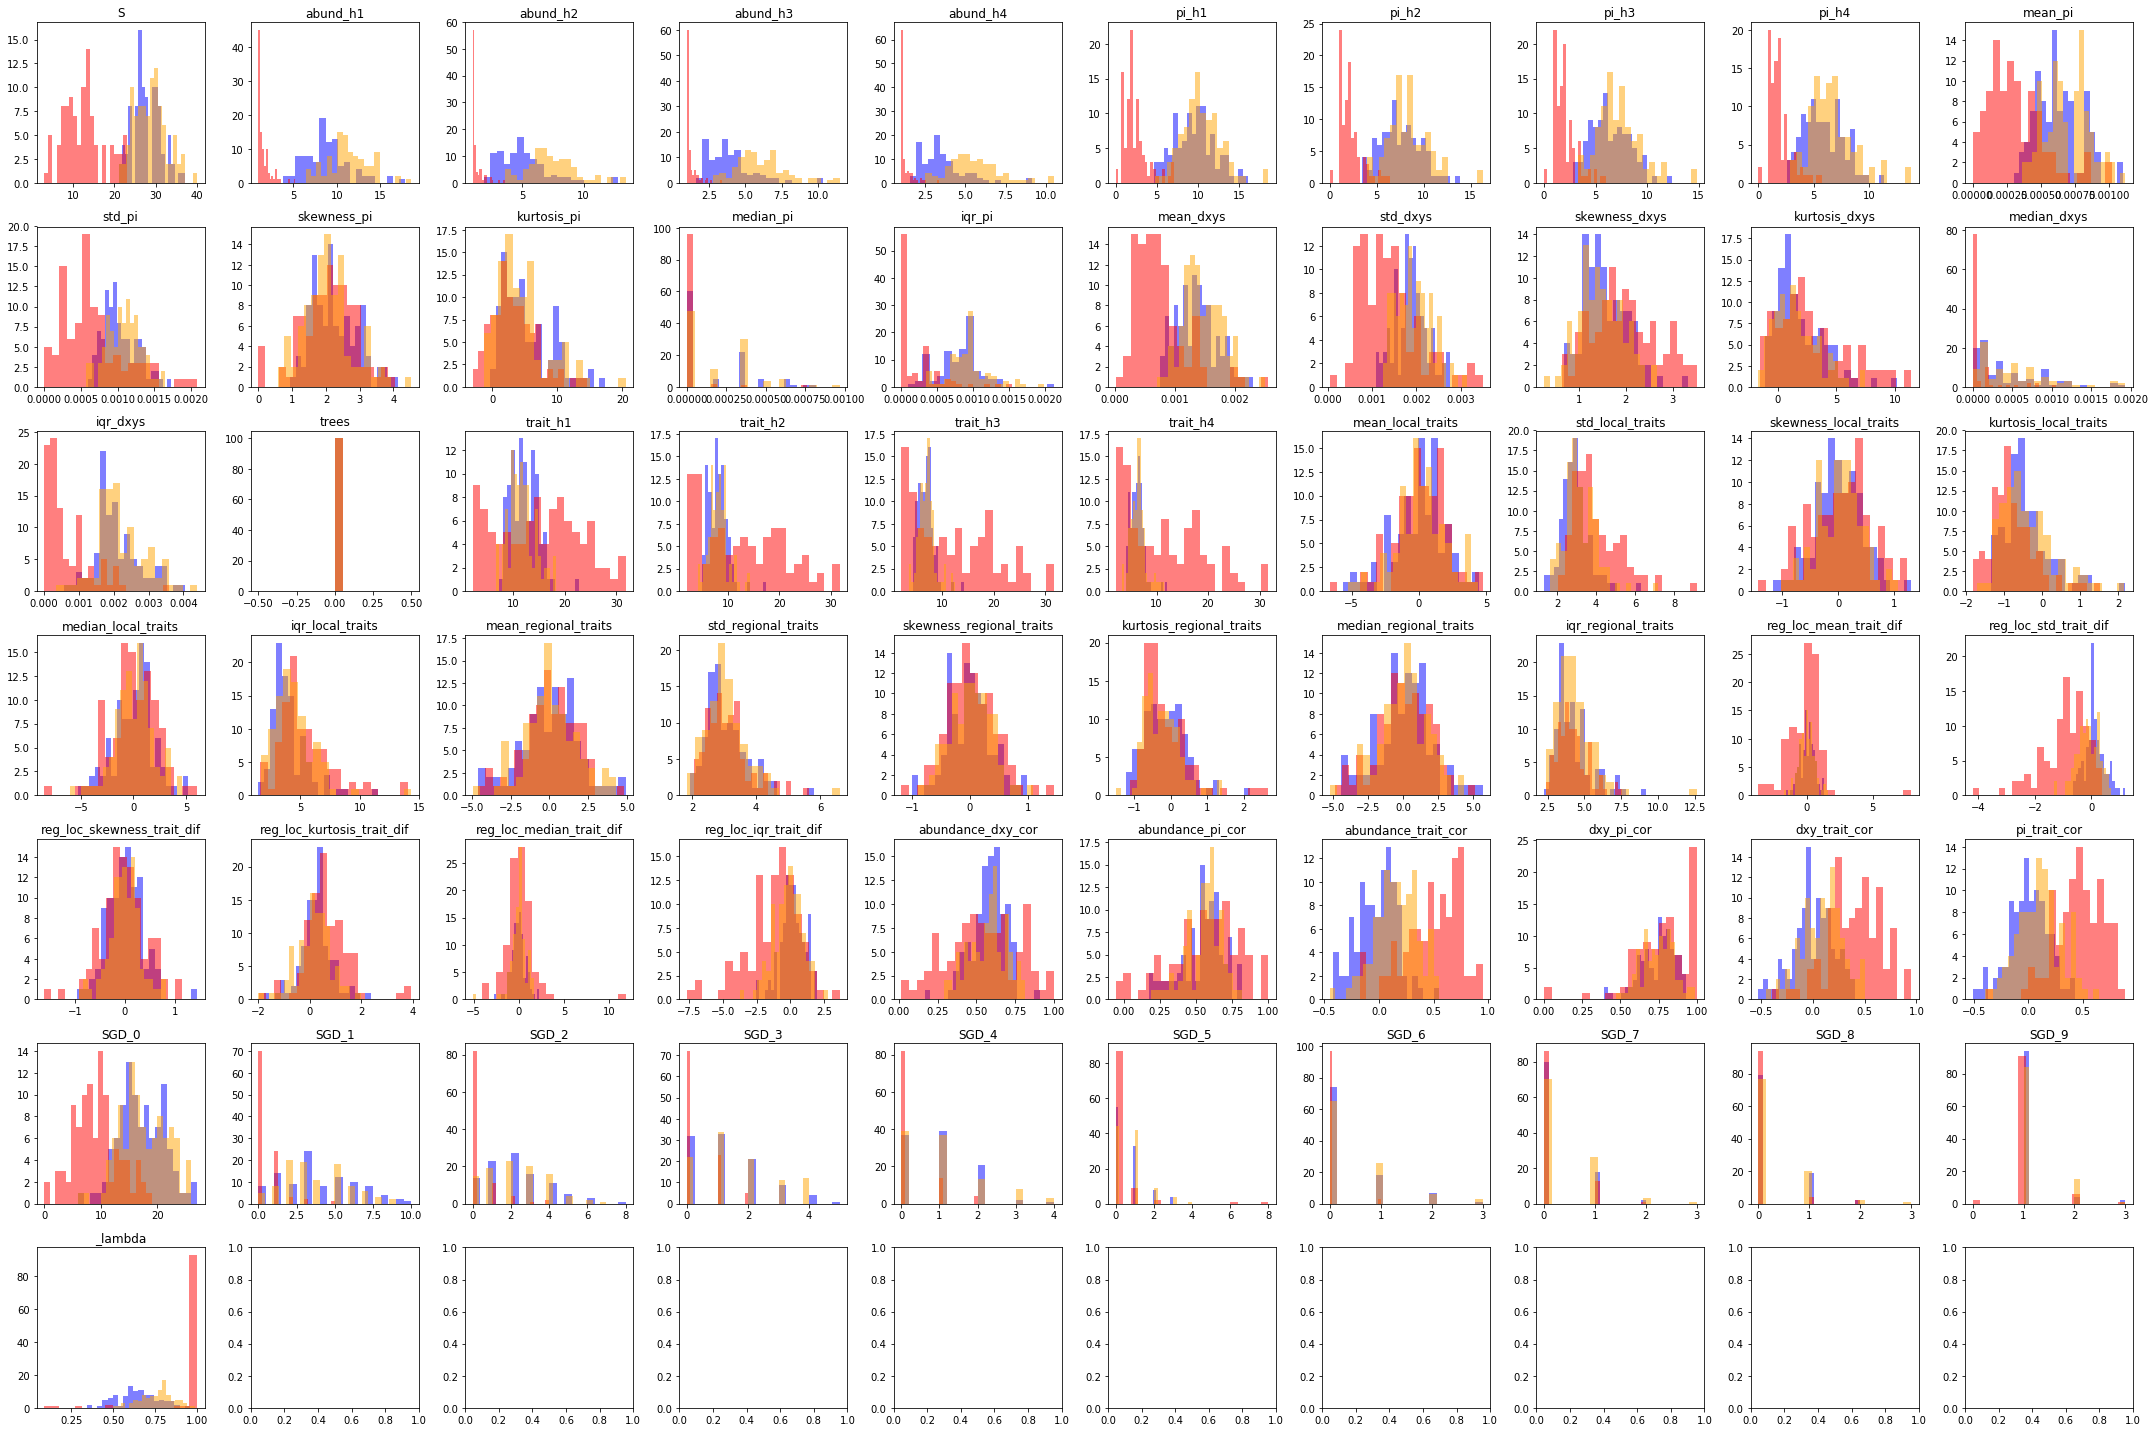

In [125]:
# This is annoying, so we can plot them in one giant figure
# Mean is blue
# pairwise is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for ss, ax in zip(list(ss_columns) + ["_lambda"], axs):
    ax.hist(neut_df[ss], color='blue', bins=20, alpha=0.5)
    ax.hist(comp_df[ss], color='red', bins=20, alpha=0.5)
    ax.hist(pw_comp_df[ss], color='orange', bins=20, alpha=0.5)
    ax.set_title(ss)
fig.tight_layout()


# Can we get rid of the fucking dendropy dependency?

Looks like "Yes".

In [134]:
!python -V
!which python
!hostname

Python 3.6.9 :: Anaconda, Inc.
/home/isaac/miniconda2/envs/MESS/bin/python
goatzilla


In [3]:
ipyclient = ipp.Client(cluster_id="MESS")
reunion = MESS.Region("LaReunion")
#print(reunion.get_params())
len(ipyclient)
reunion.run(sims=40, ipyclient=ipyclient)

    Generating 40 simulation(s).
  [####################] 100%  Performing Simulations    | 0:00:49 | 
  [####################] 100% 
    Finished 40 simulations
 

In [145]:
!wget https://compphylo.github.io/Oslo2019/MESS_files/MESS_simulations/SIMOUT.txt
!wc -l SIMOUT.txt

--2020-02-27 16:30:33--  https://compphylo.github.io/Oslo2019/MESS_files/MESS_simulations/SIMOUT.txt
Resolving compphylo.github.io (compphylo.github.io)... 185.199.109.153, 185.199.111.153, 185.199.110.153, ...
Connecting to compphylo.github.io (compphylo.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14234338 (14M) [text/plain]
Saving to: ‘SIMOUT.txt’

SIMOUT.txt          100%[===================>]  13.57M  9.44MB/s    in 1.4s    

2020-02-27 16:30:36 (9.44 MB/s) - ‘SIMOUT.txt’ saved [14234338/14234338]

24440 SIMOUT.txt


In [164]:
!wget https://raw.githubusercontent.com/messDiv/MESS/master/empirical_data/Reunion_spiders/spider.dat
spider_df = pd.read_csv("spider.dat", index_col=0)
spider_df[:5]

--2020-02-28 04:33:06--  https://raw.githubusercontent.com/messDiv/MESS/master/empirical_data/Reunion_spiders/spider.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1469 (1.4K) [text/plain]
Saving to: ‘spider.dat’

spider.dat          100%[===================>]   1.43K  --.-KB/s    in 0s      

2020-02-28 04:33:06 (143 MB/s) - ‘spider.dat’ saved [1469/1469]



,abundance,pi
GL-01a,150,0.011126
GL-01b,107,0.023247
GL-01c,32,0.000252
GL-02,2,0.000000
GL-03,200,0.028499


In [165]:
rgr = MESS.inference.Regressor(empirical_df=spider_df, simfile="SIMOUT.txt", target_model="neutral", algorithm="rfq")
est = rgr.predict(select_features=False, param_search=False, quick=True, verbose=False)


/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'pre

/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'pre

/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'pre

In [166]:
from IPython.display import display
display(est)

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8234.8,0.414226,6770.3,0.004401,1048.3,0.000712,0.873747
lower 0.025,6475.0,0.004460,3524.0,0.001305,383.0,0.000510,0.831290
upper 0.975,9718.0,0.769620,8053.0,0.009970,1857.0,0.001224,0.935120


In [167]:
est["J"] /= 2
est["m"] *= 10
est["_lambda"] /= 2
est

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8234.8,0.414226,3385.15,0.044011,1048.3,0.000712,0.436874
lower 0.025,6475.0,0.004460,1762.00,0.013050,383.0,0.000510,0.415645
upper 0.975,9718.0,0.769620,4026.50,0.099700,1857.0,0.001224,0.467560


    Generating 20 simulation(s).
  [####################] 100%  Finished 19 simulations   | 0:02:57 | 
 
Calculating PCs and plotting


/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:2970: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


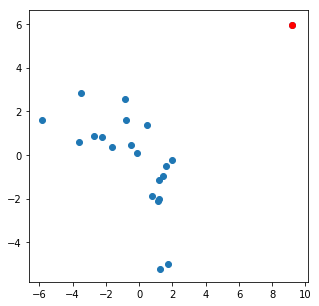

In [168]:
MESS.inference.posterior_predictive_check(empirical_df=spider_df,
                                          parameter_estimates=est,
                                          est_only=True,
                                          nsims=20,
                                          verbose=True,
                                          force=True)

##### data = reunion
data.fancy_plots(quiet=False)

In [18]:
outdir = data._get_simulation_outdir(prefix="fancy-")
outdir
island = data.islands["Loc1"]
MESS.plotting.plot_rank_abundance_through_time(outdir,
                                                island.species_through_time,
                                                island.lambda_through_time,
                                                verbose=False)


Generating abundance distributions through time
  [####################] 100%  
 

In [12]:
MESS.plotting.normalized_pi_dxy_heatmaps(outdir,
                                            island.species_through_time,
                                            island.lambda_through_time)

Generating pi x dxy heatmap animation
  [####################] 100%  
 

<Figure size 432x288 with 0 Axes>

In [13]:
MESS.plotting.normalized_pi_dxy_heatmaps(outdir,
                                        island.species_through_time,
                                        island.lambda_through_time,
                                        one_d=True)

Generating 1-D pi_w heatmap animation
  [####################] 100%  
 

<Figure size 432x288 with 0 Axes>

In [17]:
MESS.plotting.plot_abundance_vs_colonization_time(outdir,
                                                        island.species_through_time,
                                                        island.lambda_through_time)

Generating abundance vs colonization plots through time
  [####################] 100%  
 

In [15]:
species = island.species_through_time[10000]
list(map(int, [x.stats["abundance"] for x in species]))
[x.stats for x in species][0]

name                     57.0
trait                 2.61703
abundance                   5
Ne_local              2666.67
Ne_meta                 17680
tdiv                     6629
growth_rate                 0
migration_rate    5.65696e-08
segsites_tot                2
pi_tot            0.000507849
segsites_local              2
segsites_meta               0
pi_local          0.000974659
pi_meta                     0
dxy               0.000526316
da                3.89864e-05
TajimaD             -0.580831
dtype: object

In [21]:
0.0017/1e6

1.7e-09